# Deep Learning Image Classification of David Bowie Characters

This model attempts to classify the many personas from David Bowie's Career.

* Ziggy Stardust
* Thin White Duke
* Aladdin Sane
* Jareth The Goblin King


# Setup

In [ ]:
The following commands need to be run to use the fastai library.

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai import *
from fastai.vision import *

# Download Images

The following images from Google Image search are defined in the data/url_CLASS_NAME.txt files.

In [13]:
data_path = 'data/david_bowie/'
classes = [ 'ziggy_stardust', 'thin_white_duke', 'aladdin_sane', 'jareth_the_goblin_king']
download_count = 500
path = '/home/jupyter/.fastai/data'

In [22]:
for class_name in classes:
    print(class_name)
    urls_file = data_path + 'urls_' + class_name + '.txt'   
    dest = Path(path + class_name)
    dest.mkdir(parents=True, exist_ok=True)  
    download_images(urls_file, dest, max_pics=download_count)
    print('')


ziggy_stardust


Error https://banner2.kisspng.com/20180424/tje/kisspng-the-rise-and-fall-of-ziggy-stardust-and-the-spider-smokes-5adf0e2c040b40.8429438715245675960166.jpg 'content-length'
Error https://c8.alamy.com/comp/A26TTC/david-bowie-as-ziggy-stardust-in-1972-A26TTC.jpg 'content-length'
Error https://d.ibtimes.co.uk/en/full/1480702/david-bowie-dead-fashion-icon.jpg?w=736&e=11b03ed0841ec6a5759ab40018b46ebf 'content-length'
Error https://c8.alamy.com/comp/A26TRF/david-bowie-as-ziggy-stardust-in-1972-A26TRF.jpg 'content-length'
Error https://3m84r11gpx1j11puas2g5wfl-wpengine.netdna-ssl.com/wp-content/uploads/2017/06/BowieZiggy.jpg 'content-length'
Error https://c8.alamy.com/comp/FHNR5B/david-bowie-ziggy-stardust-and-the-spiders-from-mars-1973-FHNR5B.jpg 'content-length'
Error http://blog.bloomsburyvisualarts.com/wp-content/uploads/2016/01/48-688x1024.jpg HTTPConnectionPool(host='blog.bloomsburyvisualarts.com', port=80): Max retries exceeded with url: /wp-content/uploads/2016/01/48-688x1024.jpg (Caus

Error http://hipquotient.com/wp-content/uploads/2016/01/bowie-mtv.jpg 'content-length'
Error https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=36058576452 'content-length'
Error https://www.lemonrock.com/gxb/16955_1945.jpg?1 'content-length'
Error https://www.fadingad.com/fadingadblog/wp-content/uploads/2016/02/david-bowie-thin-white-duke-hair.jpg 'content-length'
Error https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=10153867040116453 'content-length'
Error http://www.analoguegallery.com/image.php?search=http://www.analoguegallery.com/image/cache/data/DB002PPOST-960x960.jpg 'content-length'
Error https://steemitimages.com/0x0/https://i.pinimg.com/736x/90/d3/81/90d38153c965fa2cdc526b6858368d44--the-thin-white-duke-david-bowie-thin-white-duke.jpg 'content-length'
Error https://c7.alamy.com/comp/EX3R38/david-bowie-uk-rock-musician-in-his-thin-white-duke-guise-in-1976-EX3R38.jpg 'content-length'
Error https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=5

Error http://www.aaaedinburgh.co.uk/wp-content/uploads/2018/02/david_Fot_Fotor-563x353.jpg 'content-length'
Error https://c8.alamy.com/comp/MFE8RC/david-bowies-aladdin-sane-album-sleeve-cover-by-rca-records-MFE8RC.jpg 'content-length'
Error http://www.gbeye.com/thumbnails/lightbox_123999_1474538691.jpg 'content-length'
Error https://c8.alamy.com/comp/A26WG3/david-bowie-as-aladdin-sane-in-1974-A26WG3.jpg 'content-length'
Error https://cdn2.lot-art.com/_upl/62/31627850--r19140--t1529733079--sa2eb--david-bowie-aladdin-sane-1-disque-33t-sous-pochett-normal.jpg 'content-length'
Error http://heartlandrecords.com.au/wp-content/uploads/2018/05/david-bowie-aladdin-sane-silver-lp-front.jpg 'content-length'
Error https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=10155300857667665 'content-length'
Error http://www.jukupop.com/images/amplified-ladies-david-bowie-aladdin-sane-t-shirt-white-p2492-8483_image.jpg 'content-length'
Error https://c8.alamy.com/comp/E6WB81/david-bowie-aladdin-sa

Error https://mtv.mtvnimages.com/uri/mgid:file:http:shared:mtv.com/news/wp-content/uploads/2016/01/shimmy-1452701988.gif?quality=.8&height=200&width=500 'content-length'
Error https://www.popoptiq.com/wp-content/uploads/2015/06/The-Goblin-King-Visits-Sarah-labyrinth-9029078-1920-1080.jpg 'content-length'
Error https://mcfarlane.com/wp-content/uploads/2017/04/Labyrinth_Jareth_Stylized_05.jpg 'content-length'
Error https://mcfarlane.com/wp-content/uploads/2017/04/Labyrinth_Jareth_Stylized_04.jpg 'content-length'
Error https://www.pawnamerica.com/986433-large_default/keep.jpg HTTPSConnectionPool(host='www.pawnamerica.com', port=443): Max retries exceeded with url: /986433-large_default/keep.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))
Error https://mcfarlane.com/wp-content/uploads/2017/04/Labyrinth_Jareth_Stylized_06.jpg 'content-length'
Error http://c8.alamy.com/comp/K3MEKH/labyrinth-us-1986-

## Cleanup Data

Some of the image files downloaded above seem to be invalid. So to avoid crashes in the processing later on, go through each downloaded file and delete any that we are unable to open.




In [22]:
import glob
    
for class_name in classes:
    class_dir = path + class_name + '/'
    files = glob.glob(class_dir + '*.jpg')
    for file_path in files :
        try:
            open_image(file_path)
        except IOError:
            print('Deleting bad file: ' + file_path)
            os.remove(file_path)
    

Deleting bad file: data/david_bowie/downloads/ziggy_stardust/00000069.jpg
Deleting bad file: data/david_bowie/downloads/ziggy_stardust/00000035.jpg
Deleting bad file: data/david_bowie/downloads/ziggy_stardust/00000044.jpg
Deleting bad file: data/david_bowie/downloads/ziggy_stardust/00000440.jpg
Deleting bad file: data/david_bowie/downloads/ziggy_stardust/00000242.jpg
Deleting bad file: data/david_bowie/downloads/ziggy_stardust/00000158.jpg
Deleting bad file: data/david_bowie/downloads/ziggy_stardust/00000113.jpg
Deleting bad file: data/david_bowie/downloads/ziggy_stardust/00000398.jpg
Deleting bad file: data/david_bowie/downloads/ziggy_stardust/00000185.jpg
Deleting bad file: data/david_bowie/downloads/ziggy_stardust/00000407.jpg
Deleting bad file: data/david_bowie/downloads/ziggy_stardust/00000208.jpg
Deleting bad file: data/david_bowie/downloads/ziggy_stardust/00000217.jpg
Deleting bad file: data/david_bowie/downloads/ziggy_stardust/00000296.jpg
Deleting bad file: data/david_bowie/do

In [23]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [24]:
data.classes

['aladdin_sane',
 'jareth_the_goblin_king',
 'models',
 'thin_white_duke',
 'ziggy_stardust']

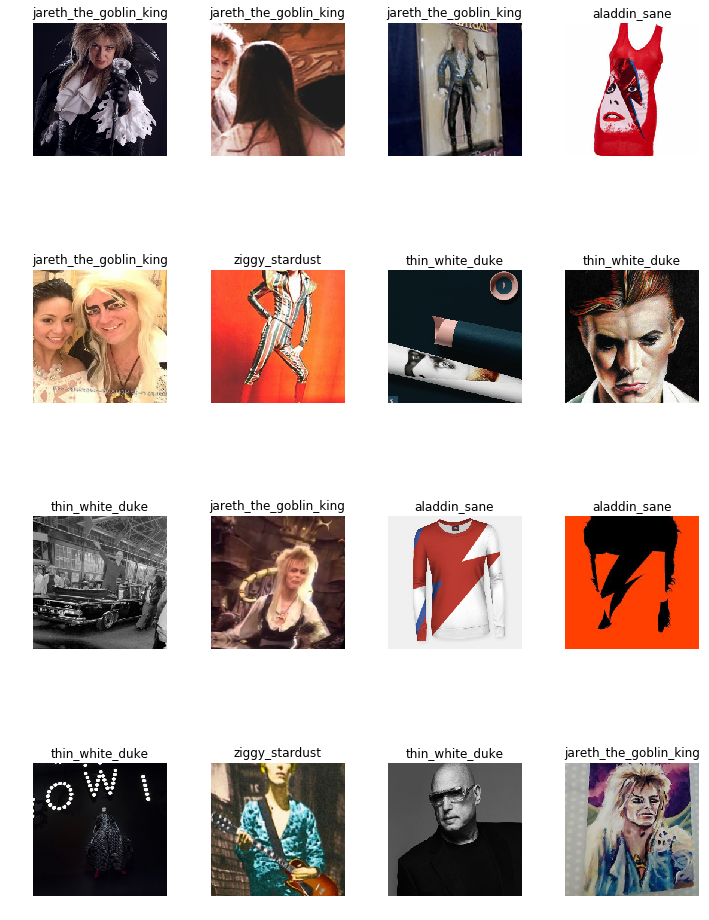

In [56]:
data.show_batch(rows=4, figsize=(10,14))

In [40]:
data.classes, data.c

(['aladdin_sane',
  'jareth_the_goblin_king',
  'thin_white_duke',
  'ziggy_stardust'],
 4)

## Train model

In [26]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [27]:
learn.fit_one_cycle(4)

Total time: 01:00
epoch  train_loss  valid_loss  error_rate
1      1.533313    0.845958    0.298817    (00:16)
2      1.118859    0.787427    0.281065    (00:14)
3      0.899902    0.736048    0.254438    (00:15)
4      0.743959    0.716121    0.266272    (00:14)



In [28]:
learn.save('stage-1')

In [29]:
learn.unfreeze()

In [30]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


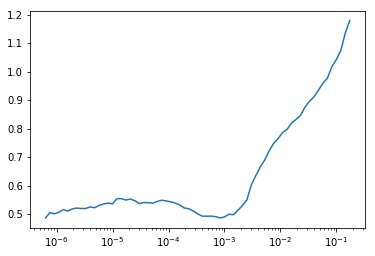

In [31]:
learn.recorder.plot()

In [32]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

Total time: 00:30
epoch  train_loss  valid_loss  error_rate
1      0.558944    0.787147    0.248521    (00:15)
2      0.432601    0.728456    0.254438    (00:15)



In [33]:
learn.save('stage-2')

## Interpretation

In [34]:
interp = ClassificationInterpretation.from_learner(learn)

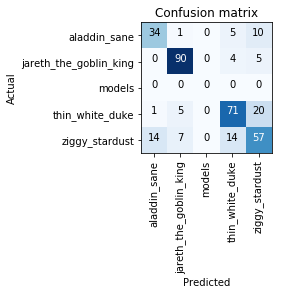

In [35]:
interp.plot_confusion_matrix()

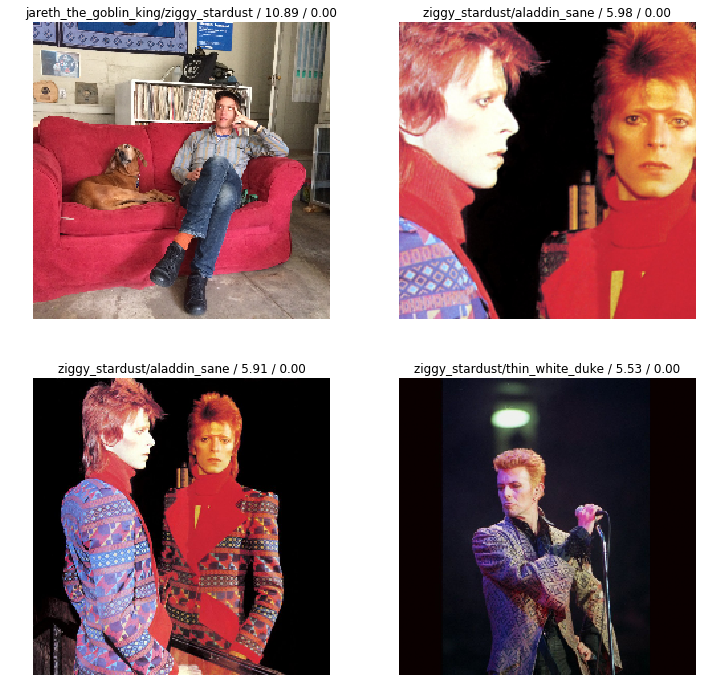

In [40]:
interp.plot_top_losses(4)